# DATA SCIENCE EXERCISE - MORTGAGE BACKED SECURITIES

Credit risk is a problem we face on a daily basis on our Data Science team. You have received in an email a mortgage
backed securities database on 50k mortgages. The database contains features about the mortgage contract, payment of
each installment and the economic environment. Understanding and cleaning up the data is your responsibility. We are
interested in how you handle the problems you will encounter.

## DATA DICTIONARY

- id: Borrower ID
- time: Time stamp of observation
- orig_time: Time stamp for origination
- first_time: Time stamp for first observation
- mat_time: Time stamp for maturity
- balance_time: Outstanding balance at observation time
- LTV_time: Loan-to-value ratio at observation time, in %
- interest_rate_time: Interest rate at observation time, in %
- hpi_time: House price index at observation time, base year = 100
- gdp_time: Gross domestic product (GDP) growth at observation time, in %
- uer_time: Unemployment rate at observation time, in %
- REtype_CO_orig_time: Real estate type condominium = 1, otherwise = 0
- REtype_PU_orig_time: Real estate type planned urban development = 1, otherwise = 0
- REtype_SF_orig_time: Single-family home = 1, otherwise = 0
- investor_orig_time: Investor borrower = 1, otherwise = 0
- balance_orig_time: Outstanding balance at origination time
- FICO_orig_time: FICO score at origination time, in %
- LTV_orig_time: Loan-to-value ratio at origination time, in %
- Interest_Rate_orig_time: Interest rate at origination time, in %
- hpi_orig_time: House price index at origination time, base year = 100
- default_time: Default observation at observation time
- payoff_time: Payoff observation at observation time
- status_time: Default (1), payoff (2), and nondefault/nonpayoff (0) observation at observation time

# IMPORT THE DATA

In [1]:
# Numpy and pandas for data manipulation
import numpy as np
import pandas as pd

# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

# Matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('mortgage.csv')
df.head()

,id,time,orig_time,first_time,mat_time,balance_time,LTV_time,interest_rate_time,hpi_time,gdp_time,...,REtype_SF_orig_time,investor_orig_time,balance_orig_time,FICO_orig_time,LTV_orig_time,Interest_Rate_orig_time,hpi_orig_time,default_time,payoff_time,status_time
0,1,25,-7,25,113,41303.42,24.498336,9.2,226.29,2.899137,...,1,0,45000.0,715,69.4,9.2,87.03,0,0,0
1,1,26,-7,25,113,41061.95,24.483867,9.2,225.10,2.151365,...,1,0,45000.0,715,69.4,9.2,87.03,0,0,0
2,1,27,-7,25,113,40804.42,24.626795,9.2,222.39,2.361722,...,1,0,45000.0,715,69.4,9.2,87.03,0,0,0
3,1,28,-7,25,113,40483.89,24.735883,9.2,219.67,1.229172,...,1,0,45000.0,715,69.4,9.2,87.03,0,0,0
4,1,29,-7,25,113,40367.06,24.925476,9.2,217.37,1.692969,...,1,0,45000.0,715,69.4,9.2,87.03,0,0,0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 622489 entries, 0 to 622488
Data columns (total 23 columns):
id                         622489 non-null int64
time                       622489 non-null int64
orig_time                  622489 non-null int64
first_time                 622489 non-null int64
mat_time                   622489 non-null int64
balance_time               622489 non-null float64
LTV_time                   622219 non-null float64
interest_rate_time         622489 non-null float64
hpi_time                   622489 non-null float64
gdp_time                   622489 non-null float64
uer_time                   622489 non-null float64
REtype_CO_orig_time        622489 non-null int64
REtype_PU_orig_time        622489 non-null int64
REtype_SF_orig_time        622489 non-null int64
investor_orig_time         622489 non-null int64
balance_orig_time          622489 non-null float64
FICO_orig_time             622489 non-null int64
LTV_orig_time              622489 non-null

All the features are numeric, but we know some of them must be objects or categories

In [3]:
# Transform to categoric
df['REtype_CO_orig_time'] = df.REtype_CO_orig_time.astype('object')
df['REtype_PU_orig_time'] = df.REtype_PU_orig_time.astype('object')
df['REtype_SF_orig_time'] = df.REtype_SF_orig_time.astype('object')
df['payoff_time'] = df.payoff_time.astype('object')
df['status_time'] = df.status_time.astype('object')
df['investor_orig_time'] = df.investor_orig_time.astype('object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 622489 entries, 0 to 622488
Data columns (total 23 columns):
id                         622489 non-null int64
time                       622489 non-null int64
orig_time                  622489 non-null int64
first_time                 622489 non-null int64
mat_time                   622489 non-null int64
balance_time               622489 non-null float64
LTV_time                   622219 non-null float64
interest_rate_time         622489 non-null float64
hpi_time                   622489 non-null float64
gdp_time                   622489 non-null float64
uer_time                   622489 non-null float64
REtype_CO_orig_time        622489 non-null object
REtype_PU_orig_time        622489 non-null object
REtype_SF_orig_time        622489 non-null object
investor_orig_time         622489 non-null object
balance_orig_time          622489 non-null float64
FICO_orig_time             622489 non-null int64
LTV_orig_time              622489 non-

# EXPLORATORY DATA ANALYSIS & DATA MANIPULATION

In [5]:
df['default_time'].value_counts()

0    607331
1     15158
Name: default_time, dtype: int64

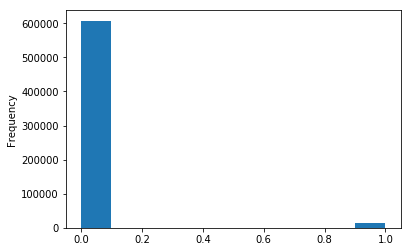

In [6]:
%matplotlib inline
df['default_time'].astype(int).plot.hist();

Due to unbalanced classes, ADASYN (Adaptive Synthetic) oversampling algorithm will be used to handle this problem on the training proccess.

In [7]:
# Find missing values
nulls = pd.DataFrame(df.isnull().sum().sort_values(ascending=False))
nulls.columns = ['Nulls']
nulls.index.name = 'Feature'
nulls

,Nulls
Feature,
LTV_time,270
status_time,0
uer_time,0
time,0
orig_time,0
first_time,0
mat_time,0
balance_time,0
interest_rate_time,0


We have 270 null values for LTV_time.

In [8]:
# Fill the null values with the mean
df = df.dropna()

In [9]:
# Check if the LTV_time where filled
nulls = pd.DataFrame(df.isnull().sum().sort_values(ascending=False))
nulls.columns = ['Nulls']
nulls.index.name = 'Feature'
nulls

,Nulls
Feature,
status_time,0
uer_time,0
time,0
orig_time,0
first_time,0
mat_time,0
balance_time,0
LTV_time,0
interest_rate_time,0


No null values anymore, lets go ahead!

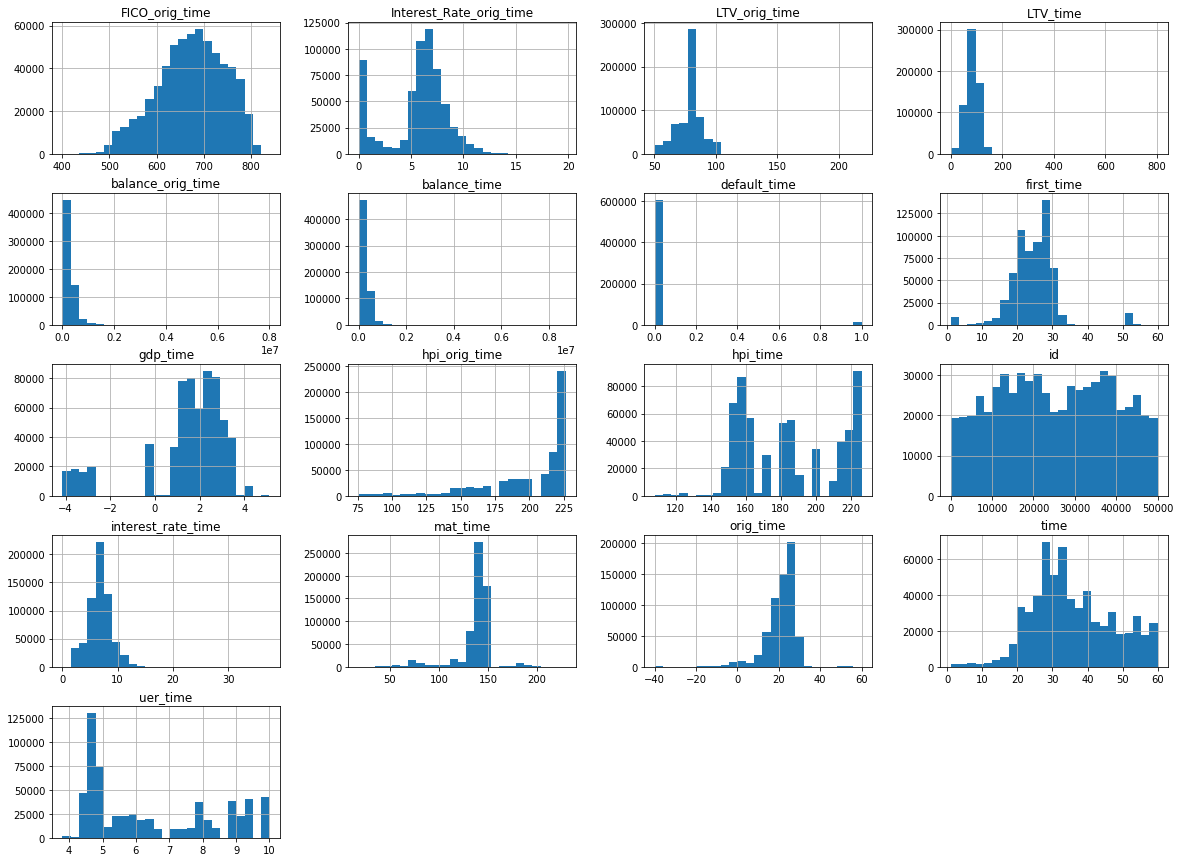

In [10]:
# Check the data distribution
df.hist(bins=25, figsize=(20,15))
plt.show()

We can observe a normal distribution to several features and the data is negative skwed for the hpi_orig_time feature.
Now, lets make some boxplots to analyze some features with more attention.

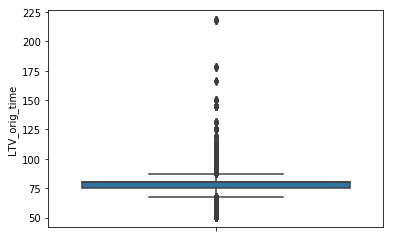

In [11]:
# boxplot of the LTV_orig_time feature
sns.boxplot(y=df["LTV_orig_time"])

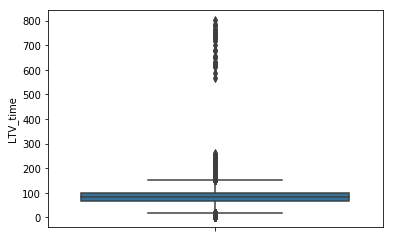

In [12]:
# boxplot of the LTV_time feature
sns.boxplot(y=df["LTV_time"])

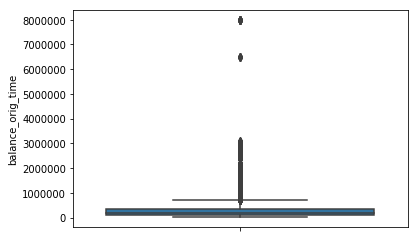

In [13]:
# boxplot of the balance_orig_time feature
sns.boxplot(y=df["balance_orig_time"])

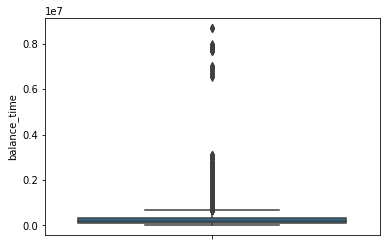

In [14]:
# boxplot of the balance_time feature
sns.boxplot(y=df["balance_time"])

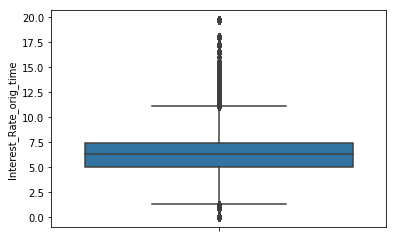

In [15]:
# boxplot of the Interes_Rate_orig_time feature
sns.boxplot(y=df["Interest_Rate_orig_time"])

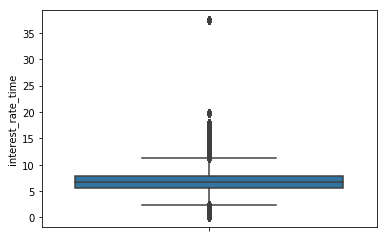

In [16]:
# boxplot of the interes_rate_time feature
sns.boxplot(y=df["interest_rate_time"])

There are some outliers on our data, and we will remove them to obtain a less skewed data distribution.

In [17]:
df_clean = df[df['LTV_time'] < 300]
df_clean = df_clean[df_clean['LTV_orig_time'] < 150]
df_clean = df_clean[df_clean['balance_orig_time'] < 6000000]
df_clean = df_clean[df_clean['balance_time'] < 6000000]
df_clean = df_clean[df_clean['interest_rate_time'] < 20]
df_clean = df_clean[df_clean['Interest_Rate_orig_time'] < 20]

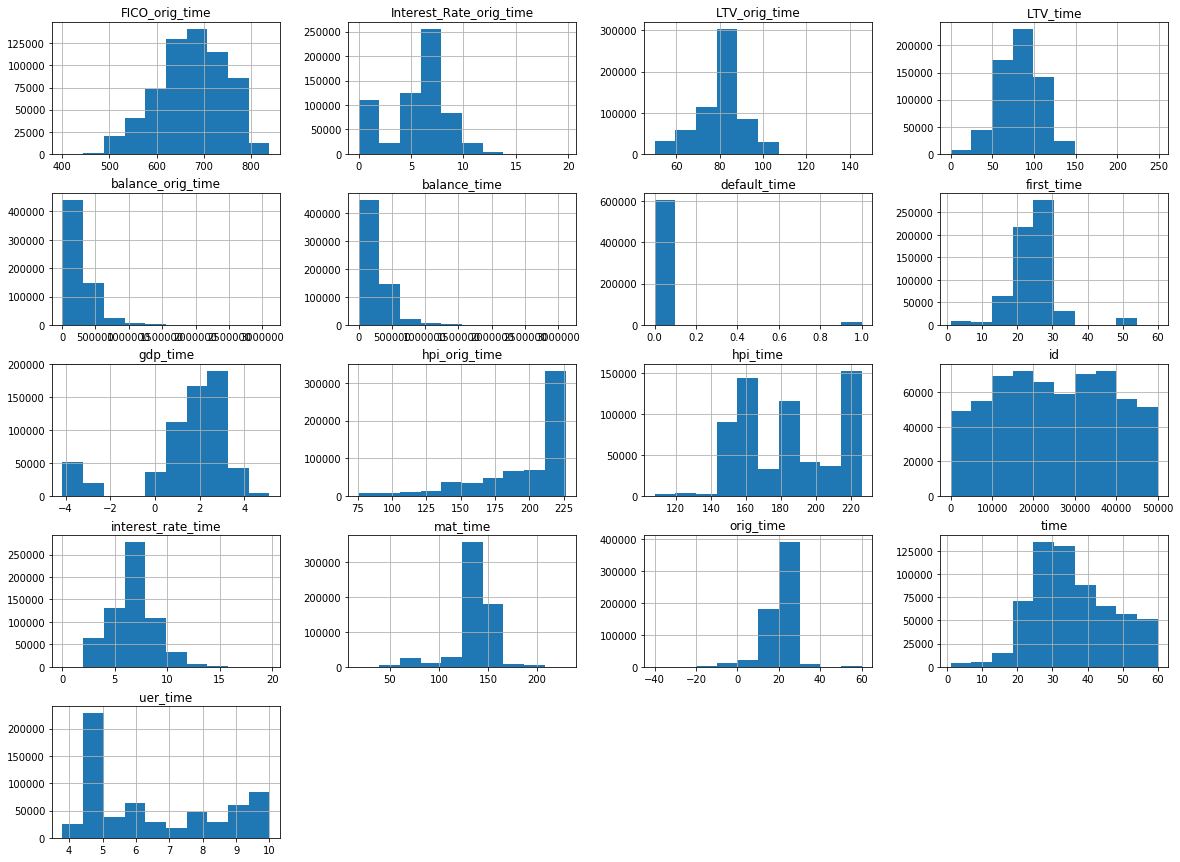

In [18]:
# Check the data distribution
df_clean.hist(figsize=(20,15))
plt.show()

In [19]:
df_clean.describe()

,id,time,orig_time,first_time,mat_time,balance_time,LTV_time,interest_rate_time,hpi_time,gdp_time,uer_time,balance_orig_time,FICO_orig_time,LTV_orig_time,Interest_Rate_orig_time,hpi_orig_time,default_time
count,622077.000000,622077.000000,622077.000000,622077.000000,622077.000000,6.220770e+05,622077.000000,622077.000000,622077.000000,622077.000000,622077.000000,6.220770e+05,622077.000000,622077.000000,622077.000000,622077.000000,622077.000000
mean,25140.962633,35.799798,20.575765,24.606087,137.215822,2.457177e+05,83.038381,6.698600,184.100891,1.381014,6.517310,2.560629e+05,673.657030,78.972188,5.650713,198.147221,0.024357
std,13750.375454,11.579964,7.608932,6.739346,19.527145,2.084073e+05,24.485288,2.061318,27.650929,1.964657,1.921427,2.141936e+05,71.687134,10.096220,2.976193,33.933645,0.154155
min,1.000000,1.000000,-40.000000,1.000000,18.000000,0.000000e+00,0.000000,0.000000,107.830000,-4.146711,3.800000,4.791500e+03,400.000000,50.100000,0.000000,75.710000,0.000000
25%,13576.000000,27.000000,18.000000,21.000000,137.000000,1.021146e+05,67.108099,5.650000,158.600000,1.104163,4.700000,1.080000e+05,626.000000,75.000000,5.000000,179.450000,0.000000
50%,24872.000000,34.000000,22.000000,25.000000,142.000000,1.807314e+05,82.251677,6.625000,180.520000,1.850689,5.700000,1.880000e+05,678.000000,80.000000,6.290000,216.770000,0.000000
75%,37040.000000,44.000000,25.000000,28.000000,145.000000,3.375123e+05,100.632216,7.875000,212.730000,2.694111,8.200000,3.520000e+05,729.000000,80.000000,7.456000,222.390000,0.000000
max,50000.000000,60.000000,60.000000,60.000000,229.000000,3.106990e+06,248.432000,19.750000,226.290000,5.132464,10.000000,3.107000e+06,840.000000,145.400000,19.750000,226.290000,1.000000


In [20]:
df_clean = df_clean.drop(['status_time','payoff_time'], axis=1)
df_clean.head()

,id,time,orig_time,first_time,mat_time,balance_time,LTV_time,interest_rate_time,hpi_time,gdp_time,...,REtype_CO_orig_time,REtype_PU_orig_time,REtype_SF_orig_time,investor_orig_time,balance_orig_time,FICO_orig_time,LTV_orig_time,Interest_Rate_orig_time,hpi_orig_time,default_time
0,1,25,-7,25,113,41303.42,24.498336,9.2,226.29,2.899137,...,0,0,1,0,45000.0,715,69.4,9.2,87.03,0
1,1,26,-7,25,113,41061.95,24.483867,9.2,225.10,2.151365,...,0,0,1,0,45000.0,715,69.4,9.2,87.03,0
2,1,27,-7,25,113,40804.42,24.626795,9.2,222.39,2.361722,...,0,0,1,0,45000.0,715,69.4,9.2,87.03,0
3,1,28,-7,25,113,40483.89,24.735883,9.2,219.67,1.229172,...,0,0,1,0,45000.0,715,69.4,9.2,87.03,0
4,1,29,-7,25,113,40367.06,24.925476,9.2,217.37,1.692969,...,0,0,1,0,45000.0,715,69.4,9.2,87.03,0


Let's create a new variable: hpi_factor, which consists of the ration between the hpi at the observed time and hpi at the origination time

In [21]:
df_clean['hpi_factor'] = df_clean['hpi_time']/df_clean['hpi_orig_time']

In [22]:
df_clean.head(20)

,id,time,orig_time,first_time,mat_time,balance_time,LTV_time,interest_rate_time,hpi_time,gdp_time,...,REtype_PU_orig_time,REtype_SF_orig_time,investor_orig_time,balance_orig_time,FICO_orig_time,LTV_orig_time,Interest_Rate_orig_time,hpi_orig_time,default_time,hpi_factor
0,1,25,-7,25,113,41303.42,24.498336,9.2,226.29,2.899137,...,0,1,0,45000.0,715,69.4,9.2,87.03,0,2.600138
1,1,26,-7,25,113,41061.95,24.483867,9.2,225.10,2.151365,...,0,1,0,45000.0,715,69.4,9.2,87.03,0,2.586464
2,1,27,-7,25,113,40804.42,24.626795,9.2,222.39,2.361722,...,0,1,0,45000.0,715,69.4,9.2,87.03,0,2.555326
3,1,28,-7,25,113,40483.89,24.735883,9.2,219.67,1.229172,...,0,1,0,45000.0,715,69.4,9.2,87.03,0,2.524072
4,1,29,-7,25,113,40367.06,24.925476,9.2,217.37,1.692969,...,0,1,0,45000.0,715,69.4,9.2,87.03,0,2.497644
5,1,30,-7,25,113,40127.97,25.318291,9.2,212.73,2.274218,...,0,1,0,45000.0,715,69.4,9.2,87.03,0,2.444330
6,1,31,-7,25,113,39718.66,26.566117,9.2,200.67,1.850689,...,0,1,0,45000.0,715,69.4,9.2,87.03,0,2.305757
7,1,32,-7,25,113,35877.03,25.872559,9.2,186.12,1.104163,...,0,1,0,45000.0,715,69.4,9.2,87.03,0,2.138573
8,1,33,-7,25,113,34410.03,25.584425,9.2,180.52,0.836859,...,0,1,0,45000.0,715,69.4,9.2,87.03,0,2.074227
9,1,34,-7,25,113,33590.47,26.008073,9.2,173.35,-0.314448,...,0,1,0,45000.0,715,69.4,9.2,87.03,0,1.991842


### CORRELATIONS

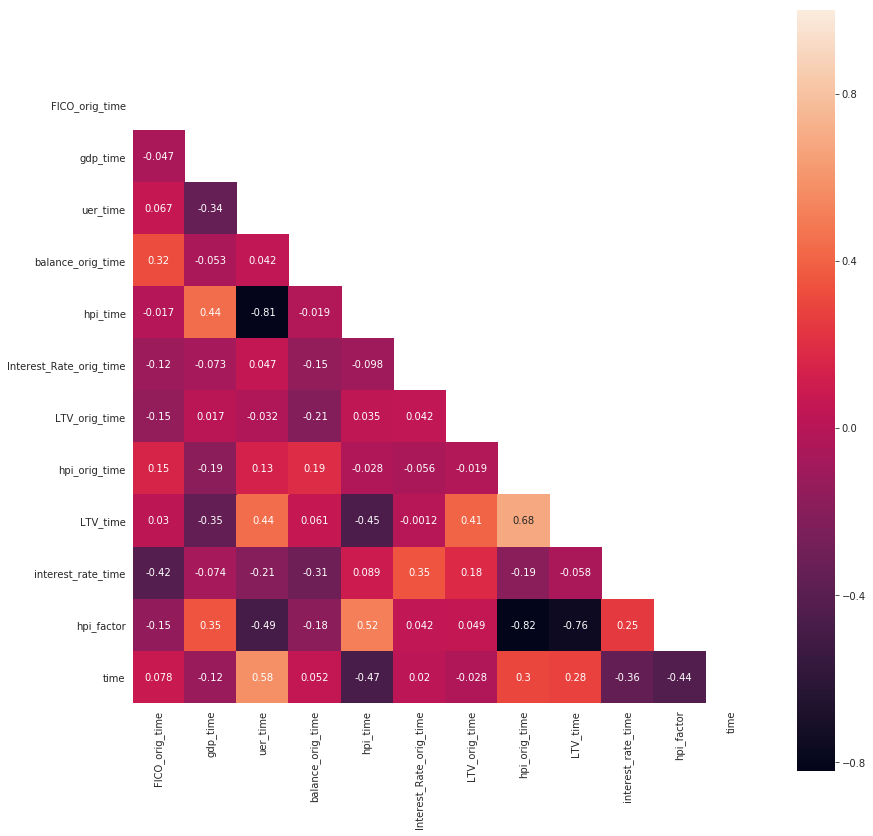

In [23]:
# Correlation matrix of numeric features
corr_features = df_clean[['FICO_orig_time', 'gdp_time', 'uer_time', 'balance_orig_time', 
                          'hpi_time', 'Interest_Rate_orig_time', 'LTV_orig_time', 'hpi_orig_time', 
                          'LTV_time', 'interest_rate_time', 'hpi_factor', 'time']]
corr_matrix=corr_features.corr()
corr_matrix
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    plt.figure(figsize=(14,14))
    sns.heatmap(corr_matrix, mask=mask, square=True, annot=True)

There are some strong correlation between some variables, but for this project all the features will be mantained.

Now, let's create some density distribution graphs as a function of the target variable.

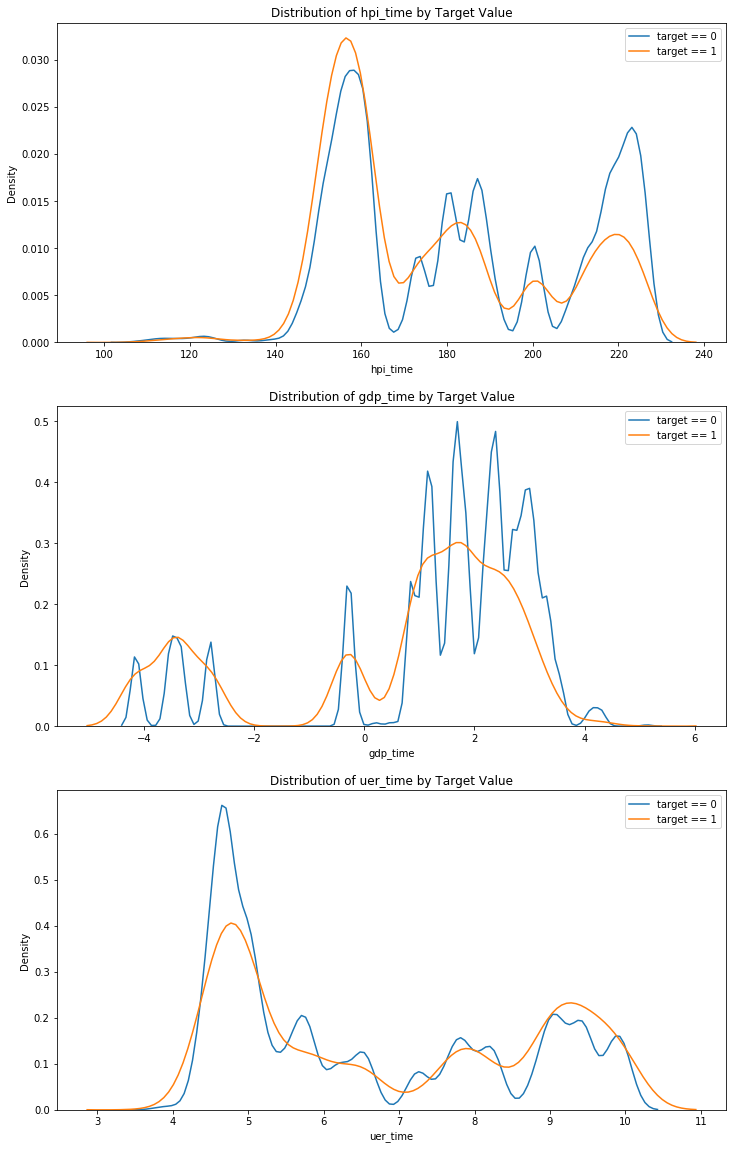

In [24]:
# Economic environment features
plt.figure(figsize = (12, 20))
# iterate through the new features
for i, feature in enumerate(['hpi_time', 'gdp_time', 'uer_time']):
    # create a new subplot for each source
    plt.subplot(3, 1, i + 1)
    # plot repaid loans
    sns.kdeplot(df_clean.loc[df_clean['default_time'] == 0, feature], label = 'target == 0')
    # plot loans that were not repaid
    sns.kdeplot(df_clean.loc[df_clean['default_time'] == 1, feature], label = 'target == 1')
    
    # Label the plots
    plt.title('Distribution of %s by Target Value' % feature)
    plt.xlabel('%s' % feature); plt.ylabel('Density');

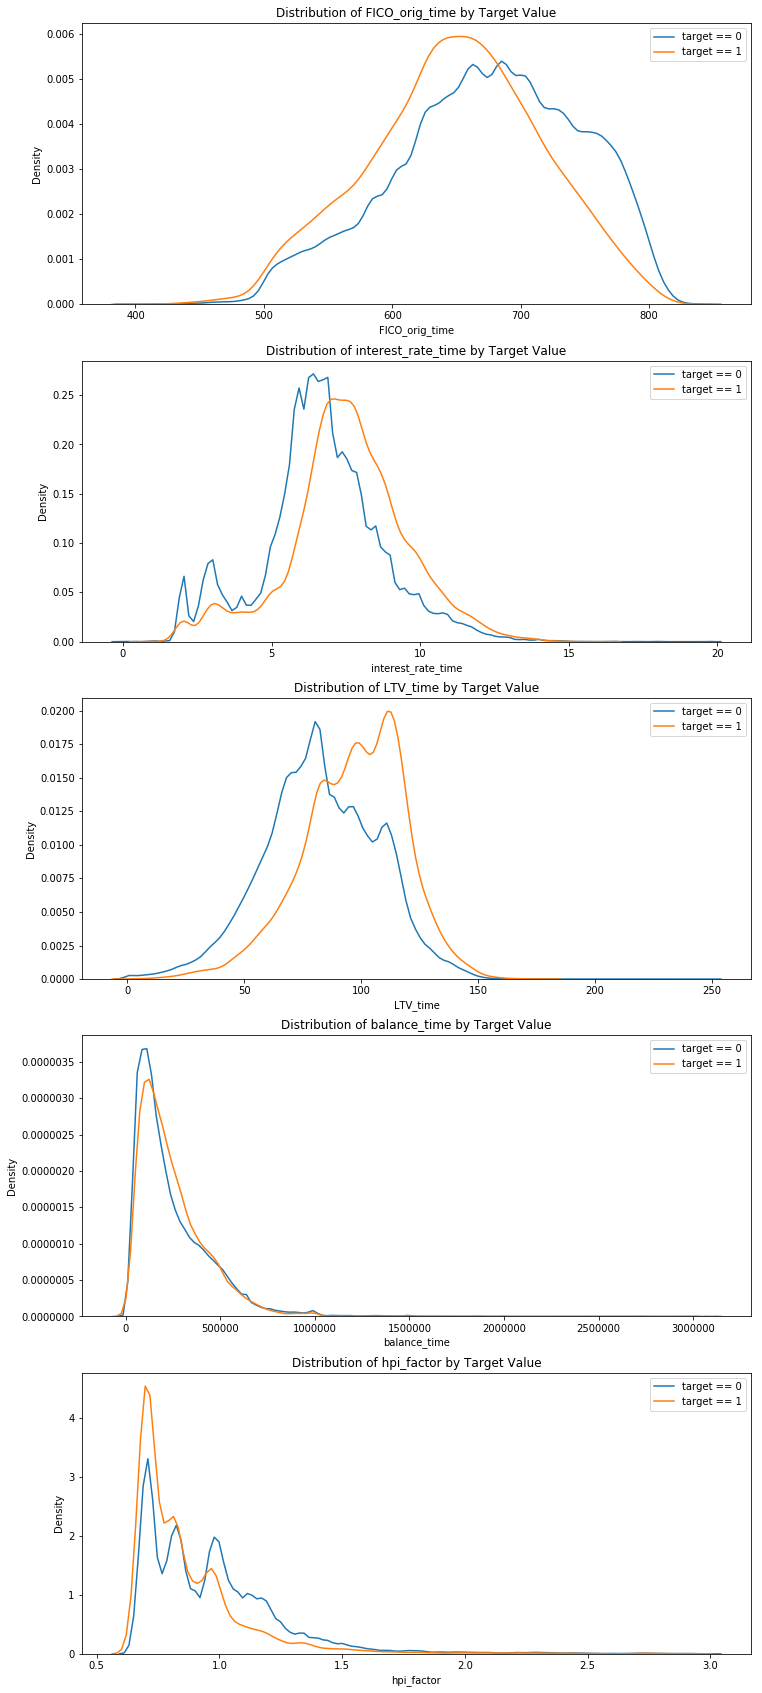

In [25]:
# Credit features
plt.figure(figsize = (12, 30))
# iterate through the new features
for i, feature in enumerate(['FICO_orig_time', 'interest_rate_time', 'LTV_time', 
                             'balance_time', 'hpi_factor']):
    # create a new subplot for each source
    plt.subplot(5, 1, i + 1)
    # plot repaid loans
    sns.kdeplot(df_clean.loc[df_clean['default_time'] == 0, feature], label = 'target == 0')
    # plot loans that were not repaid
    sns.kdeplot(df_clean.loc[df_clean['default_time'] == 1, feature], label = 'target == 1')
    
    # Label the plots
    plt.title('Distribution of %s by Target Value' % feature)
    plt.xlabel('%s' % feature); plt.ylabel('Density');

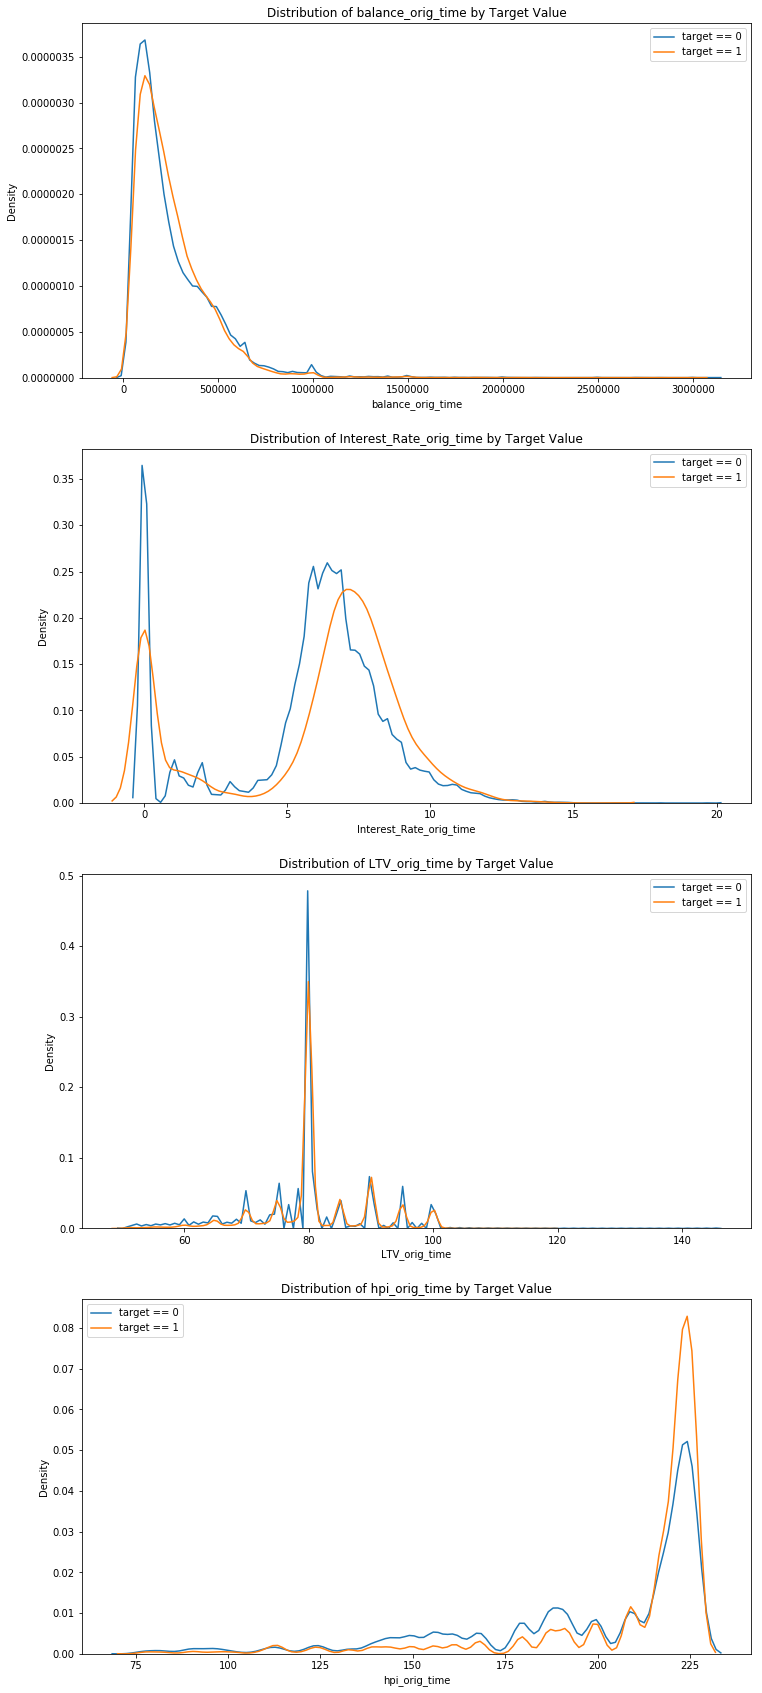

In [26]:
# Origination features
plt.figure(figsize = (12, 30))
# iterate through the new features
for i, feature in enumerate(['balance_orig_time', 'Interest_Rate_orig_time', 
                            'LTV_orig_time', 'hpi_orig_time']):
    # create a new subplot for each source
    plt.subplot(4, 1, i + 1)
    # plot repaid loans
    sns.kdeplot(df_clean.loc[df_clean['default_time'] == 0, feature], label = 'target == 0')
    # plot loans that were not repaid
    sns.kdeplot(df_clean.loc[df_clean['default_time'] == 1, feature], label = 'target == 1')
    
    # Label the plots
    plt.title('Distribution of %s by Target Value' % feature)
    plt.xlabel('%s' % feature); plt.ylabel('Density');

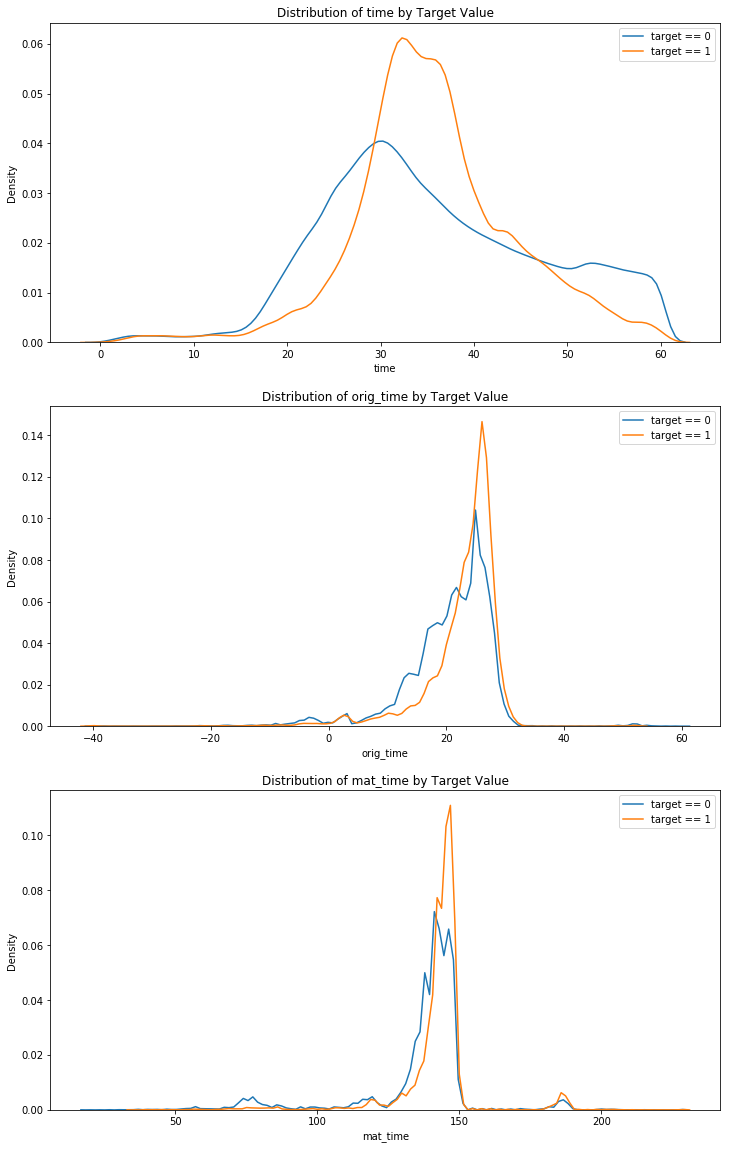

In [27]:
# Time features
plt.figure(figsize = (12, 20))
# iterate through the new features
for i, feature in enumerate(['time', 'orig_time', 'mat_time']):
    # create a new subplot for each source
    plt.subplot(3, 1, i + 1)
    # plot repaid loans
    sns.kdeplot(df_clean.loc[df_clean['default_time'] == 0, feature], label = 'target == 0')
    # plot loans that were not repaid
    sns.kdeplot(df_clean.loc[df_clean['default_time'] == 1, feature], label = 'target == 1')
    
    # Label the plots
    plt.title('Distribution of %s by Target Value' % feature)
    plt.xlabel('%s' % feature); plt.ylabel('Density');

This distributions show the importance of personal credit features, such as FICO, interest rate and LTV. It is also possible to notice that the reduction of HPI, and HPI factor causes the number of defaulters to increase.

In [28]:
corr_matrix=df_clean.corr()
corr_matrix["default_time"].sort_values(ascending=False)

default_time               1.000000
LTV_time                   0.089744
interest_rate_time         0.064943
hpi_orig_time              0.052650
orig_time                  0.048296
mat_time                   0.045663
first_time                 0.036126
LTV_orig_time              0.032155
uer_time                   0.027757
Interest_Rate_orig_time    0.012244
balance_time               0.004842
time                      -0.001277
balance_orig_time         -0.002165
id                        -0.003614
hpi_time                  -0.042521
FICO_orig_time            -0.054324
hpi_factor                -0.054584
gdp_time                  -0.066613
Name: default_time, dtype: float64

In [29]:
df_clean['default_time'] = df.default_time.astype('category')

The most relevant features seems to be insterest_rate_time, LTV_time and gdp_time. Before deep into these features, lets make a analysis of the economic environment features through time.

Between the 30 and 40 periods we have a peak of people who default their mortgage.

In [30]:
# Get the mean through time for all the features
df_median = df_clean.groupby(['time']).median()
df_median.head()

,id,orig_time,first_time,mat_time,balance_time,LTV_time,interest_rate_time,hpi_time,gdp_time,uer_time,balance_orig_time,FICO_orig_time,LTV_orig_time,Interest_Rate_orig_time,hpi_orig_time,hpi_factor
time,,,,,,,,,,,,,,,,
1,18113.0,-4.0,1.0,116.0,90487.18,66.272287,9.95,107.83,5.132464,3.8,92800.0,595.0,80.0,8.99,91.31,1.180922
2,9300.0,1.0,2.0,117.0,85906.75,69.733327,10.15,110.90,4.002023,4.0,86400.0,599.0,80.0,9.95,107.83,1.028471
3,8299.0,2.0,2.0,119.0,87086.48,73.488717,10.25,113.56,2.847896,3.9,87550.0,595.0,80.0,10.00,110.90,1.023986
4,8310.0,2.0,2.0,119.0,86576.83,71.701204,10.25,116.69,2.273480,4.2,87550.0,595.0,80.0,10.00,110.90,1.052209
5,8337.0,2.0,2.0,119.0,86494.59,69.759063,10.25,120.03,0.931129,4.4,87550.0,594.0,80.0,9.99,110.90,1.082326


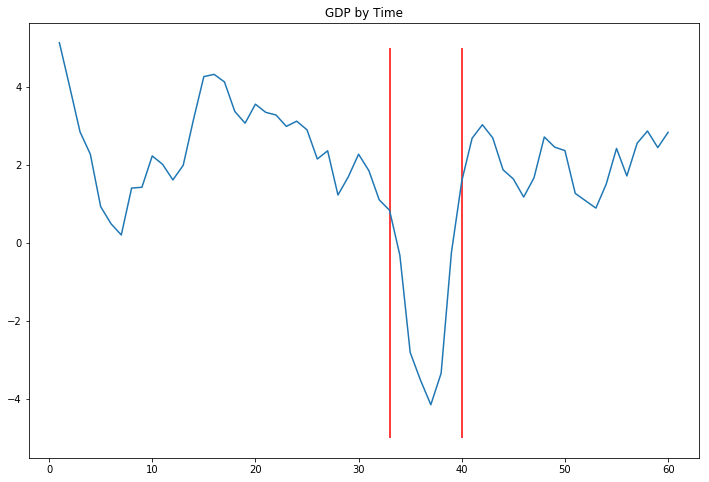

In [31]:
# GDP vs time
plt.figure(figsize = (12, 8))
plt.plot('gdp_time', data=df_median)
plt.vlines(x=33, ymin=-5, ymax=5, color='r')
plt.vlines(x=40, ymin=-5, ymax=5, color='r')
plt.title('GDP by Time')
plt.show()

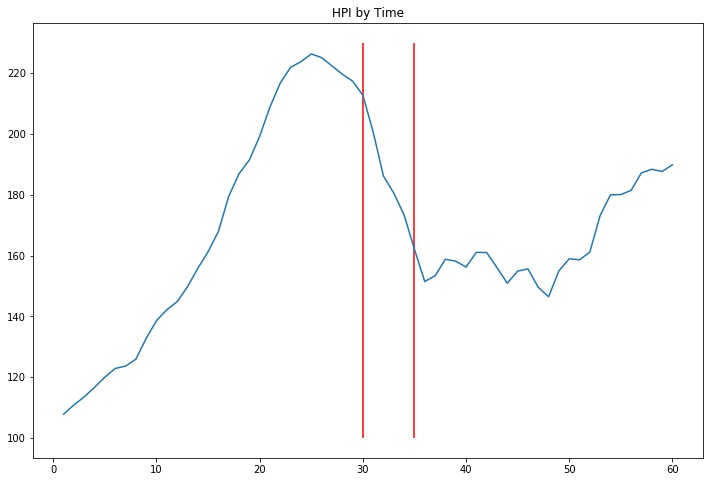

In [32]:
# HPI vs time
plt.figure(figsize = (12, 8))
plt.plot('hpi_time', data=df_median)
plt.vlines(x=30, ymin=100, ymax=230, color='r')
plt.vlines(x=35, ymin=100, ymax=230, color='r')
plt.title('HPI by Time')
plt.show()

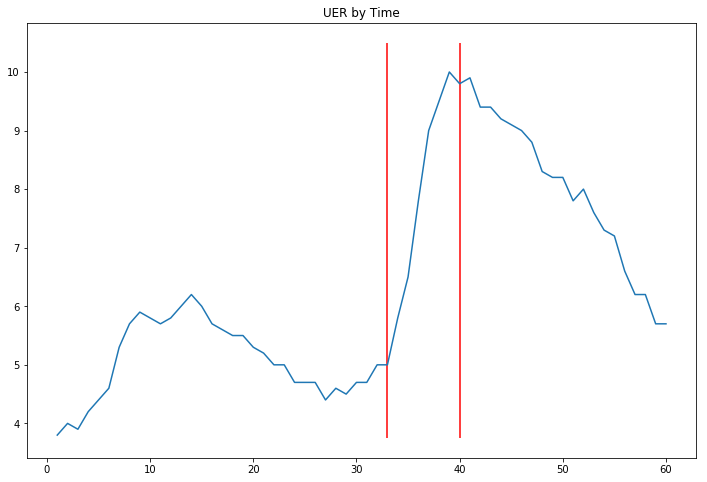

In [33]:
# UER vs time
plt.figure(figsize = (12, 8))
plt.plot('uer_time', data=df_median)
plt.vlines(x=33, ymin=3.75, ymax=10.5, color='r')
plt.vlines(x=40, ymin=3.75, ymax=10.5, color='r')
plt.title('UER by Time')
plt.show()

As we can see, the decrease in the median HPI overlaps with the decrease in gdp and increase in uer.

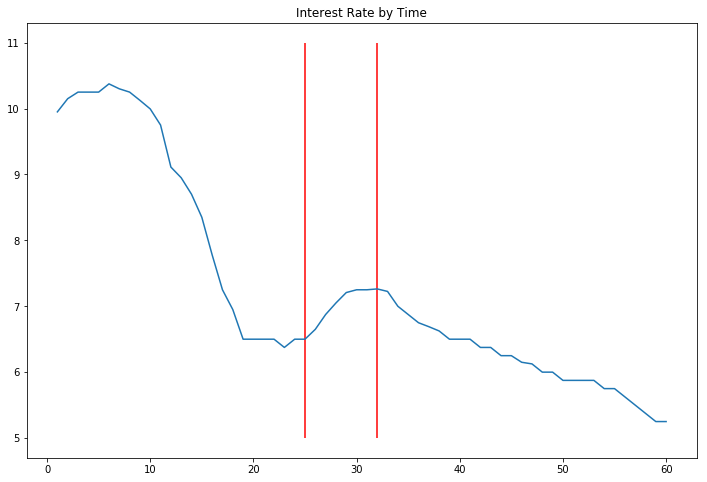

In [34]:
# Interest Rate vs time
plt.figure(figsize = (12, 8))
plt.plot('interest_rate_time', data=df_median)
plt.vlines(x=25, ymin=5, ymax=11, color='r')
plt.vlines(x=32, ymin=5, ymax=11, color='r')
plt.title('Interest Rate by Time')
plt.show()

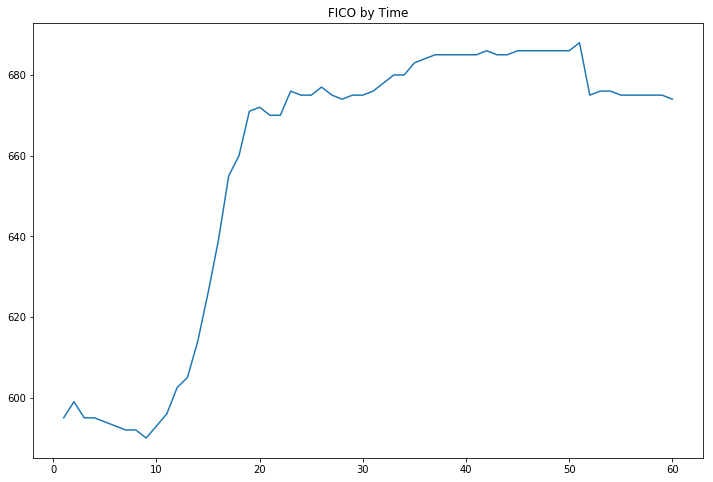

In [35]:
# FICO vs time
plt.figure(figsize = (12, 8))
plt.plot('FICO_orig_time', data=df_median)
plt.title('FICO by Time')
plt.show()

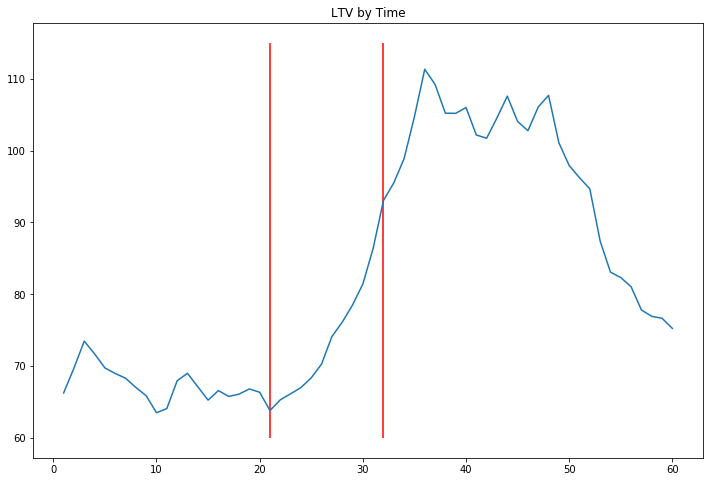

In [36]:
# LTV vs time
plt.figure(figsize = (12, 8))
plt.plot('LTV_time', data=df_median)
plt.vlines(x=21, ymin=60, ymax=115, color='r')
plt.vlines(x=32, ymin=60, ymax=115, color='r')
plt.title('LTV by Time')
plt.show()

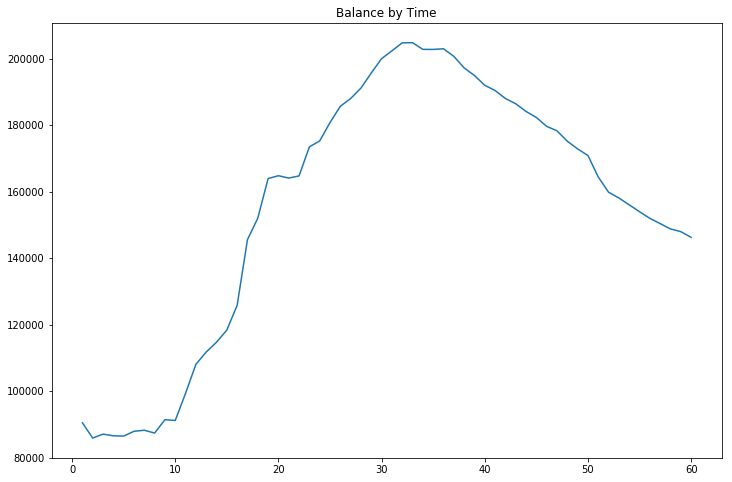

In [37]:
# Balance vs time
plt.figure(figsize = (12, 8))
plt.plot('balance_time', data=df_median)
plt.title('Balance by Time')
plt.show()

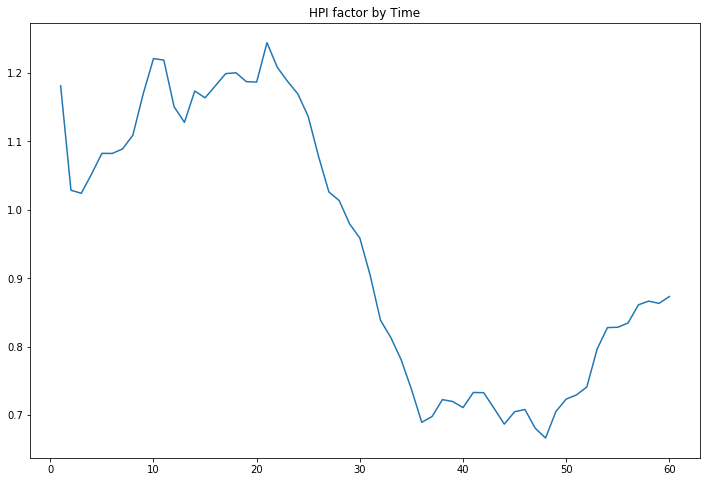

In [38]:
# HPI factor vs time
plt.figure(figsize = (12, 8))
plt.plot('hpi_factor', data=df_median)
plt.title('HPI factor by Time')
plt.show()

From the period 20 became easier to people obtain a mortgage with higher values of LTV and higher interest rates. So, they start to default their mortgage and the HPI decreases at the same time, then the banks can't have their money back and people who bought backed security shares lose their money, resulting in a economic crises between 30 and 40 periods.

To predict the last period of time, when time=60.

In [39]:
df_probability = df_clean[df_clean['time'] > 59]
df_probability.shape

(7996, 22)

In [40]:
df_clean = df_clean[df_clean['time'] <= 59]
df_clean.shape

(614081, 22)

In [41]:
df_clean_sample = df_clean.sample(frac=0.1, random_state=0)
df_clean_sample.shape

(61408, 22)

# BUILDING A MODEL FOR 10%

In [42]:
X = df_clean_sample.drop(['id', 'time', 'first_time', 'default_time'], axis=1)
X.head()

,orig_time,mat_time,balance_time,LTV_time,interest_rate_time,hpi_time,gdp_time,uer_time,REtype_CO_orig_time,REtype_PU_orig_time,REtype_SF_orig_time,investor_orig_time,balance_orig_time,FICO_orig_time,LTV_orig_time,Interest_Rate_orig_time,hpi_orig_time,hpi_factor
181641,19,140,98549.65,66.876342,6.250,225.10,2.151365,4.7,0,1,0,0,100250.0,716,80.0,6.250,191.42,1.175948
102101,22,142,231905.74,117.353333,3.875,146.45,2.715903,8.3,0,1,0,0,234000.0,787,80.0,5.875,216.77,0.675601
614262,27,87,223446.44,56.966931,6.575,158.60,1.269044,7.8,0,0,1,0,308000.0,594,56.0,6.575,222.39,0.713162
419186,25,145,827759.45,104.270832,6.500,156.21,1.585966,9.8,0,0,1,0,862500.0,653,75.0,6.500,226.29,0.690309
204369,26,146,518582.10,78.688207,6.500,219.67,1.229172,4.6,0,1,0,0,520000.0,773,77.0,6.500,225.10,0.975877


In [43]:
X.shape

(61408, 18)

In [44]:
y = df_clean_sample.iloc[:, 20].values

In [45]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))
X = scaler.fit_transform(X)

C:\Users\Travi\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64, object were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [46]:
from imblearn.over_sampling import ADASYN

print("Before OverSampling, counts of label '1': {}".format(sum(y==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y==0)))

adasyn = ADASYN(sampling_strategy=0.7, random_state=0)
X, y = adasyn.fit_sample(X, y.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y==0)))

Before OverSampling, counts of label '1': 1553
Before OverSampling, counts of label '0': 59855 

After OverSampling, the shape of train_X: (101600, 18)
After OverSampling, the shape of train_y: (101600,) 

After OverSampling, counts of label '1': 41745
After OverSampling, counts of label '0': 59855


## SELECTING THE ALGORITHM

In [47]:
from sklearn.linear_model import LogisticRegression
lr_cl = LogisticRegression(C=0.001)
lr_cl.fit(X,y)

LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

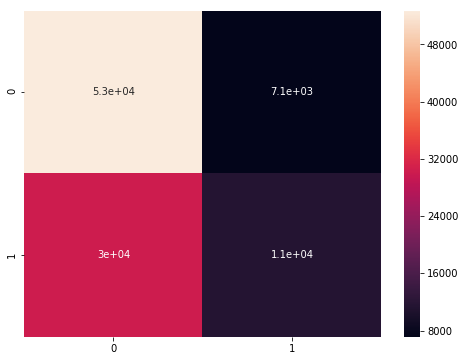

In [48]:
from sklearn.metrics import classification_report, confusion_matrix
pred_lr = lr_cl.predict(X)
cm = confusion_matrix(y, pred_lr)
plt.figure(figsize = (8, 6))
sns.heatmap(cm, annot=True)

In [49]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
scores_lr = cross_val_score(lr_cl, X, y, cv=5, scoring='roc_auc')
scores_lr.mean()

0.7032359503286775

In [50]:
from sklearn.ensemble import ExtraTreesClassifier
et_cl = ExtraTreesClassifier(n_estimators = 100, random_state = 0, verbose = 1, n_jobs = -1)
et_cl.fit(X, y)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    2.4s finished


ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
           oob_score=False, random_state=0, verbose=1, warm_start=False)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.4s finished


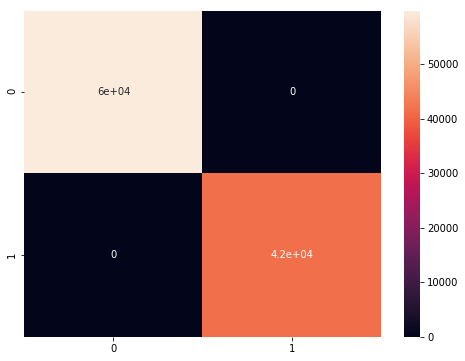

In [51]:
pred_et = et_cl.predict(X)
cm = confusion_matrix(y, pred_et)
plt.figure(figsize = (8, 6))
sns.heatmap(cm, annot=True)

In [52]:
scores_et = cross_val_score(et_cl, X, y, cv=5, scoring='roc_auc')
scores_et.mean()

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.5s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    2.3s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]:

0.9941439076242453

Feature ranking:
1. feature 16 (0.083284)
2. feature 4 (0.082630)
3. feature 13 (0.081460)
4. feature 6 (0.078436)
5. feature 0 (0.074287)
6. feature 5 (0.069158)
7. feature 3 (0.068223)
8. feature 7 (0.065733)
9. feature 14 (0.062758)
10. feature 17 (0.059221)
11. feature 15 (0.058823)
12. feature 2 (0.051324)
13. feature 12 (0.051287)
14. feature 1 (0.050482)
15. feature 10 (0.022323)
16. feature 11 (0.018146)
17. feature 9 (0.012906)
18. feature 8 (0.009519)


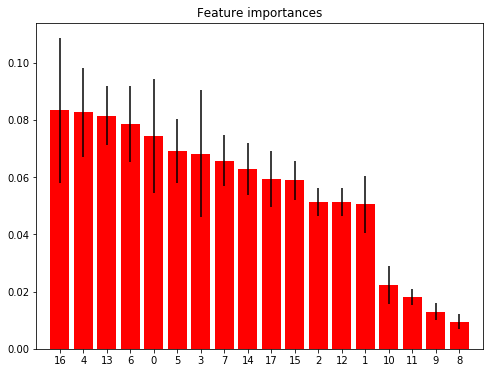

In [53]:
importances_et = et_cl.feature_importances_
std_et = np.std([tree.feature_importances_ for tree in et_cl.estimators_],
             axis=0)
indices_et = np.argsort(importances_et)[::-1]
# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices_et[f], importances_et[indices_et[f]]))

# Plot the feature importances of the forest
plt.figure(figsize = (8, 6))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances_et[indices_et],
       color="r", yerr=std_et[indices_et], align="center")
plt.xticks(range(X.shape[1]), indices_et)
plt.xlim([-1, X.shape[1]])
plt.show()

In [54]:
from sklearn.ensemble import RandomForestClassifier
rf_cl = RandomForestClassifier(n_estimators = 100, random_state = 0, verbose = 1, n_jobs = -1)
rf_cl.fit(X, y)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    4.6s finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=0, verbose=1, warm_start=False)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.3s finished


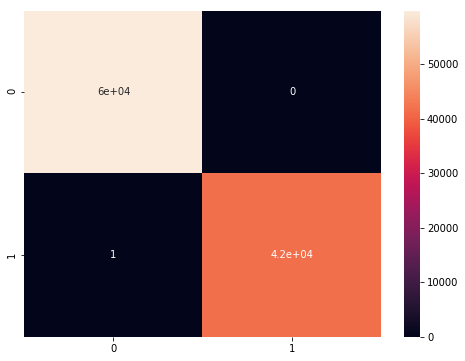

In [55]:
pred_rf = rf_cl.predict(X)
cm = confusion_matrix(y, pred_rf)
plt.figure(figsize = (8, 6))
sns.heatmap(cm, annot=True)

In [56]:
scores_rf = cross_val_score(rf_cl, X, y, cv=5, scoring='roc_auc')
scores_rf.mean()

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.8s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.7s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]:

0.9953924613540094

Feature ranking:
1. feature 1 (0.132678)
2. feature 16 (0.132107)
3. feature 0 (0.126120)
4. feature 4 (0.082995)
5. feature 3 (0.063775)
6. feature 13 (0.060525)
7. feature 14 (0.057607)
8. feature 6 (0.055530)
9. feature 5 (0.050473)
10. feature 7 (0.048693)
11. feature 17 (0.045409)
12. feature 2 (0.042149)
13. feature 12 (0.040566)
14. feature 15 (0.040004)
15. feature 10 (0.008870)
16. feature 11 (0.005130)
17. feature 9 (0.004304)
18. feature 8 (0.003065)


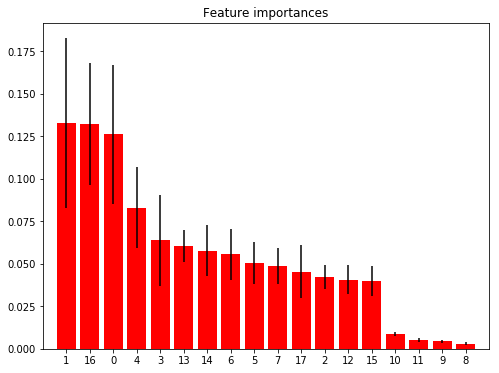

In [57]:
importances_rf = rf_cl.feature_importances_
std_rf = np.std([tree.feature_importances_ for tree in rf_cl.estimators_],
             axis=0)
indices_rf = np.argsort(importances_rf)[::-1]
# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices_rf[f], importances_rf[indices_rf[f]]))

# Plot the feature importances of the forest
plt.figure(figsize = (8, 6))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances_rf[indices_rf],
       color="r", yerr=std_rf[indices_rf], align="center")
plt.xticks(range(X.shape[1]), indices_rf)
plt.xlim([-1, X.shape[1]])
plt.show()

The feature weights of the ExtraTreesClassifier are more even distributed than the RandomForestClassifier, which represents a difference in the learning of the algorithms.

In [58]:
X_prob = df_probability.drop(['id', 'time', 'first_time', 'default_time'], axis=1)
y_prob = df_probability.iloc[:, 20]

In [59]:
pred_lr_prob = lr_cl.predict_proba(X_prob)

In [60]:
y_prob = y_prob.astype('int')

In [61]:
from sklearn.metrics import log_loss
# logarithmic loss for the lr classifier
log_loss(y_prob, pred_lr_prob)

0.18573879251890535

In [62]:
# logarithmic loss for the et classifier
pred_et_prob = et_cl.predict_proba(X_prob)
log_loss(y_prob, pred_et_prob)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


0.12848839285706484

In [63]:
# logarithmic loss for the rf classifier
pred_rf_prob = rf_cl.predict_proba(X_prob)
log_loss(y_prob, pred_rf_prob)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


0.2807388257693327

The RandomForestClassifier have the worst logarithmic loss than the LogisticRegression, making us conclude that the algorithm could be overfitted and a more generalized classification model leads to better results.
The ExtraTreesClassifier presents the smallest logarithmic loss, so this classifier will be used to fit 100% of the data!

According to this [`link`]('https://stackoverflow.com/questions/22409855/randomforestclassifier-vs-extratreesclassifier-in-scikit-learn'), the ExtraTreesClassifier can generalize better than the RandomForestClassifier for some cases.

# BUILDIND A MODEL FOR 100%

In [64]:
X_100 = df_clean.drop(['id', 'time', 'first_time', 'default_time'], axis=1)
y_100 = df_clean.iloc[:, 20]

In [65]:
X = scaler.fit_transform(X_100)

C:\Users\Travi\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64, object were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [66]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_100==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_100==0)))

adasyn_100 = ADASYN(sampling_strategy=0.7, random_state=0)
X_100, y_100 = adasyn_100.fit_sample(X_100, y_100.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_100.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_100.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_100==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_100==0)))

Before OverSampling, counts of label '1': 15109
Before OverSampling, counts of label '0': 598972 

After OverSampling, the shape of train_X: (1012330, 18)
After OverSampling, the shape of train_y: (1012330,) 

After OverSampling, counts of label '1': 413358
After OverSampling, counts of label '0': 598972


In [67]:
y_100 = y_100.astype('int')

In [68]:
et_cl_100 = et_cl.fit(X_100, y_100)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   16.7s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   43.3s finished


In [69]:
pred_et_100 = et_cl_100.predict_proba(X_prob)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


In [70]:
log_loss(y_prob, pred_et_100)

0.2845244020811896

Apparently, we had the same a problem of overfitting using 100% of the data, increasing the logarithmic loss!

# CONCLUSION

- The ExtraTreesClassifier makes a good job predicting the probability of default, while the RandomForestClassifier overfits easier.
- Some new features, like the mean balance and mean interest rate by period of time for the state of the borrower can improve the learning and help us to get better results.
- The logarithmic loss proved to be a good and simple metric to evaluate the precision of the probabilities predicted by the model.
- The logarithmic loss can be reduced in the future with different machine learning algorithms, such as SVC and K-NN, or by model tuning.
- Using 100% of the data the ExtraTreesClassifier also overfits, increasing the logarithmic loss.
- The ExtraTreesClassifier using 10% of the data presents the smaller logarithmic loss for predicting the probabilities of default.